In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/19_3, MCD.csv'
filename_clean = '../csv_detection_info_clean/19_3, MCD.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/19/3, MCD'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.7230010.3.0.3.5.1.10746932.811999467...,627,799,629,801,1.000000,19,3,"3, MCD"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.7230010.3.0.3.5.1.10746934.101809786...,585,757,882,1054,0.999997,19,3,"3, MCD"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.608...,1692,1865,1086,1259,0.999206,19,3,"3, MCD"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.82.1.1.1430.1216030460.10.0.0.10.608...,1470,1647,1655,1833,0.969731,19,3,"3, MCD"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.17640.20190923.95259.0.0.dcm,674,856,693,876,0.997363,19,3,"3, MCD"
...,...,...,...,...,...,...,...,...,...,...
88,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.4003130511.394.39500.48418.36900.21...,672,815,677,819,1.000000,19,3,"3, MCD"
89,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.4121478566.493.21317.43865.7018.701...,797,1033,936,1172,0.990343,19,3,"3, MCD"
90,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.535901600.48685.37700.33596.49321.6...,590,788,1466,1660,0.996511,19,3,"3, MCD"
91,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.655657756.64132.17734.48713.22818.8...,866,1096,1237,1471,0.993348,19,3,"3, MCD"


### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

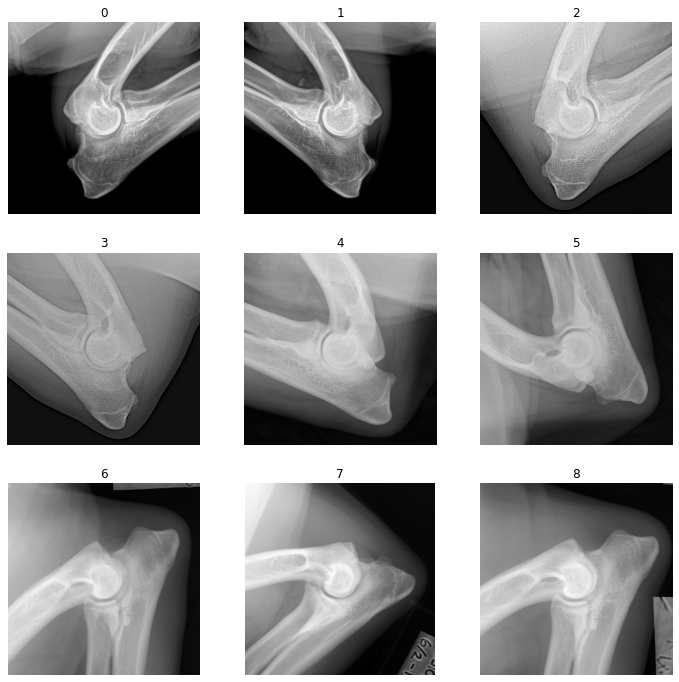

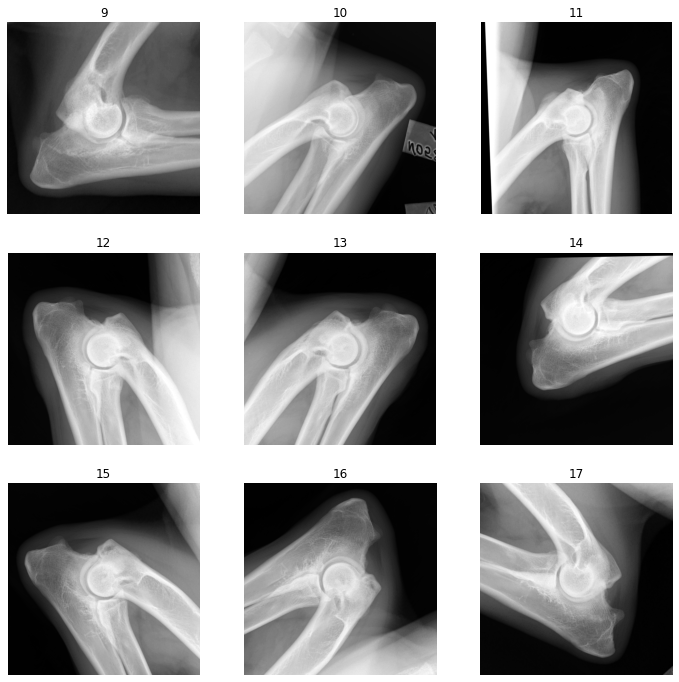

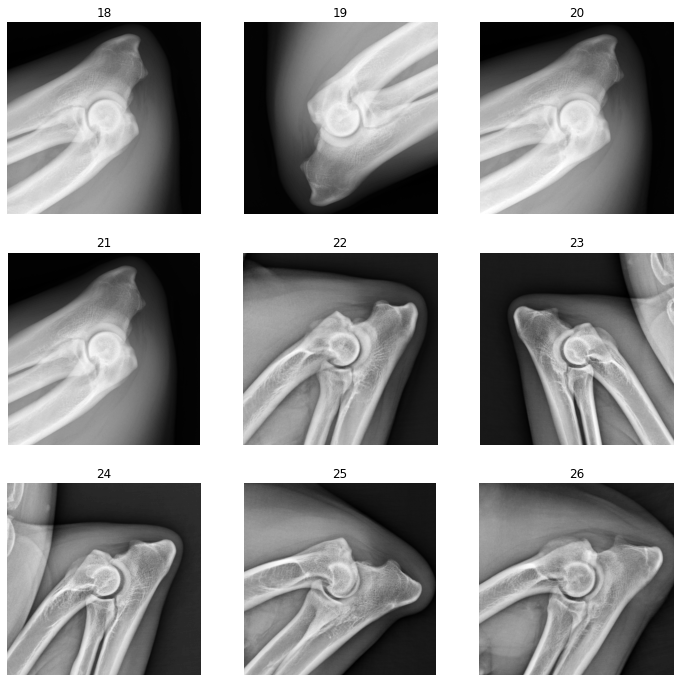

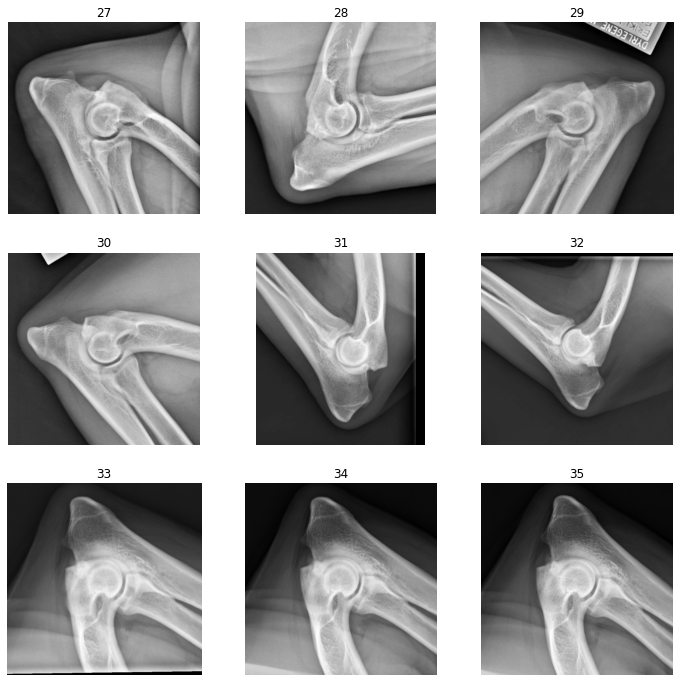

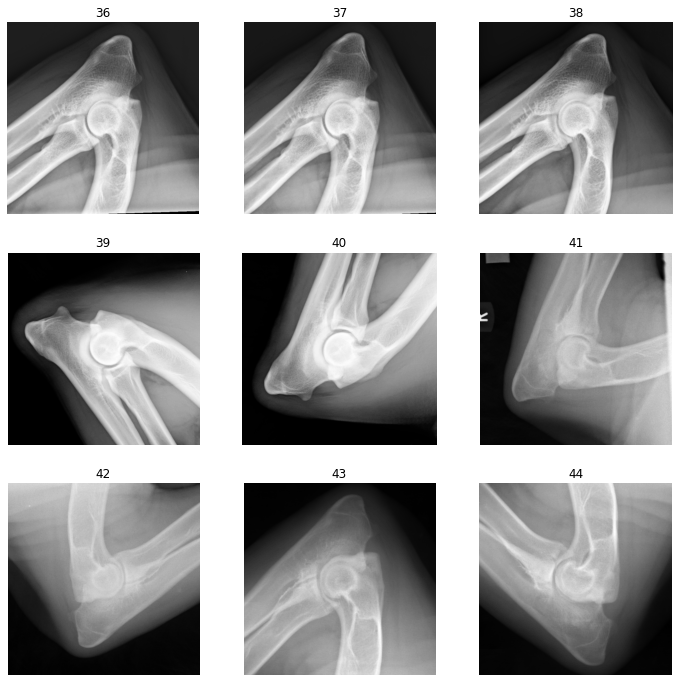

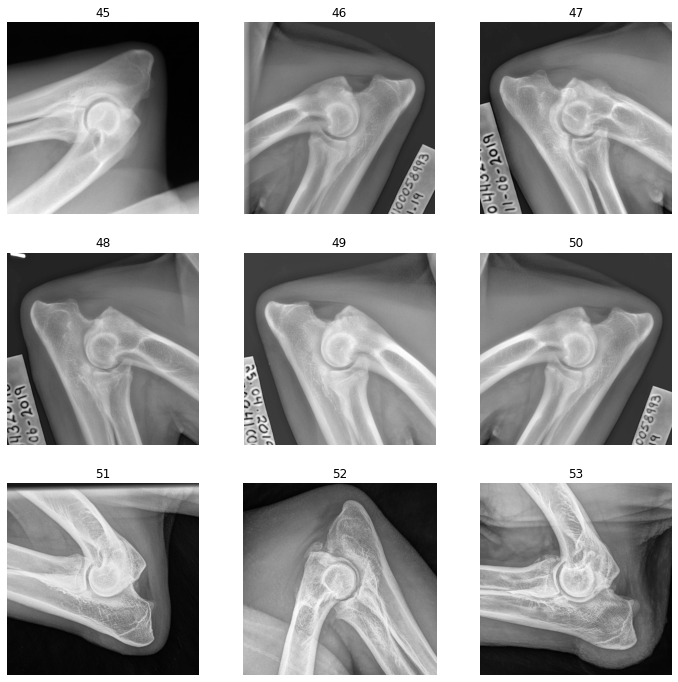

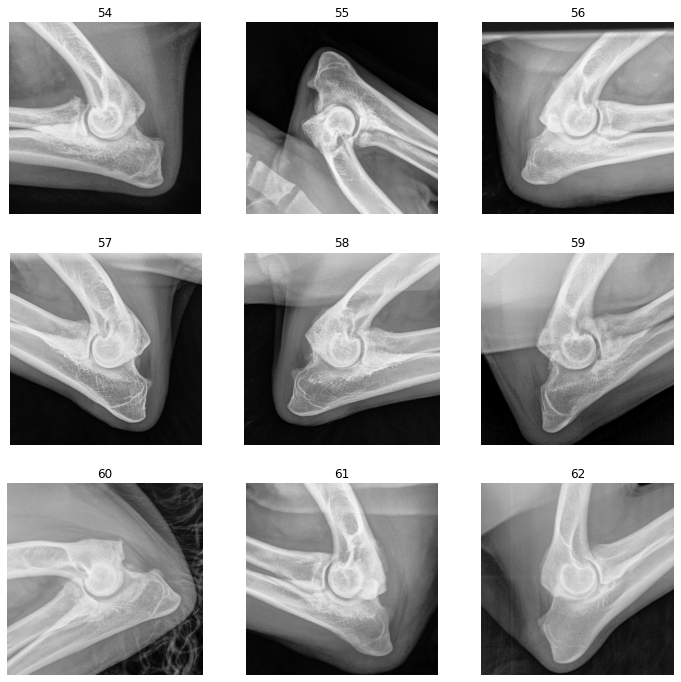

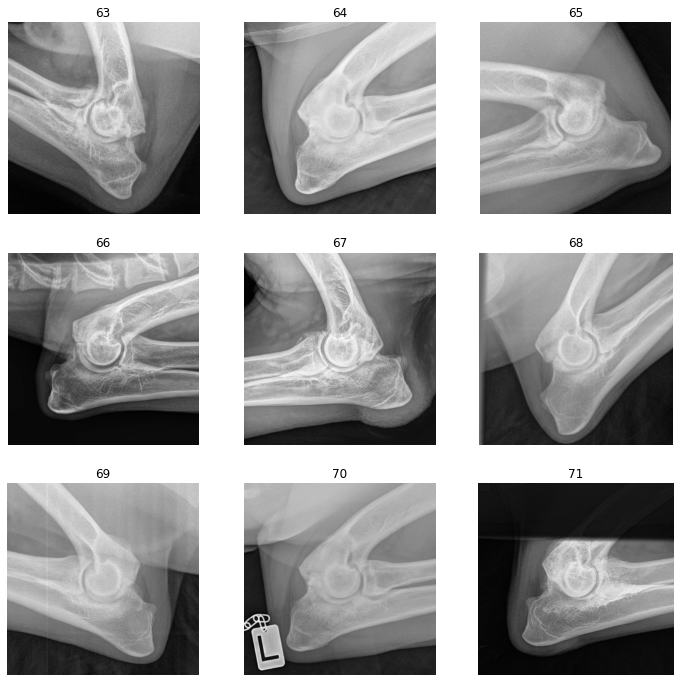

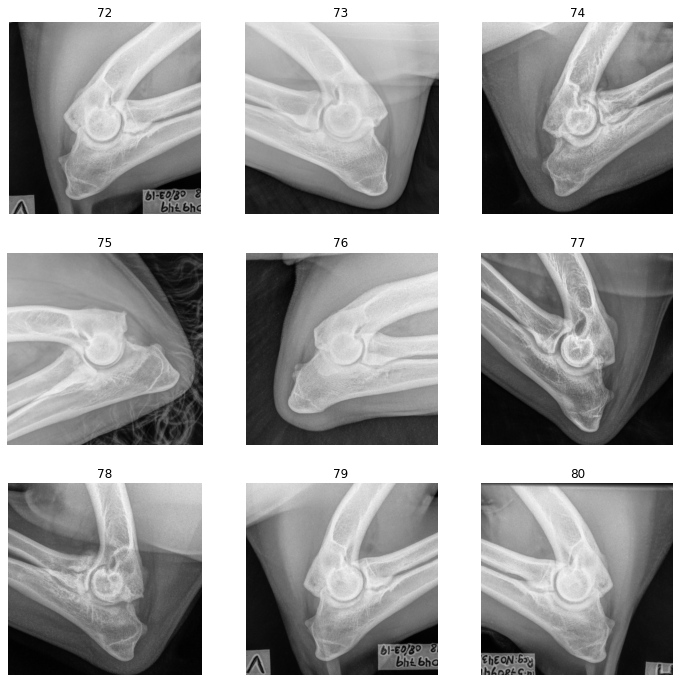

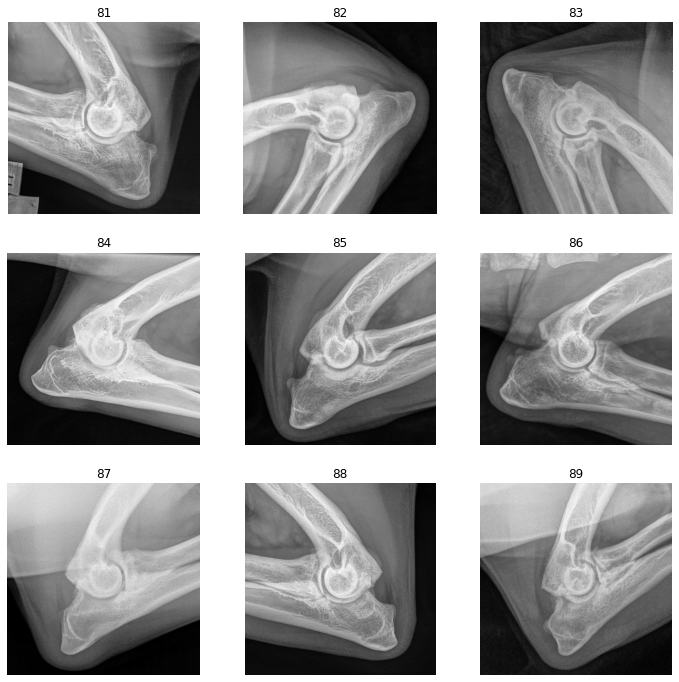

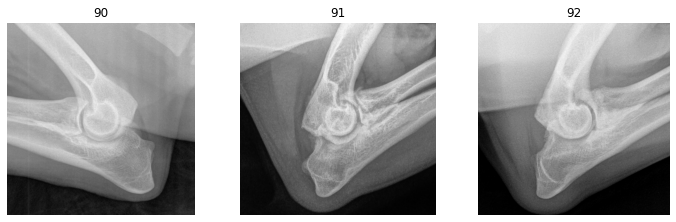

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
detection_df.to_csv(filename_clean, index=False)